In [1]:
import math, re, sys, itertools

import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
START = pd.to_datetime("2007-01-01 00:00:00+00:00")
END = pd.to_datetime("2018-08-14 00:00:00+00:00")

STANDARD_TIMEZONE = "+01:00"

In [3]:
astro2000 = pd.read_csv("Data/WaterLevel/AstroNieuwpoortContinu/zrx_Data_Astrogetij_NPT_2000-2014.txt", delimiter = "\t", names = ['DateTime', 'Astro[m]'], dtype = {"DateTime": "string", "Astro[m]": "float32"}, skiprows = 2)
index = astro2000["DateTime"] + "00" + "+00:00"
astro2000.index = pd.to_datetime(index, format = "%Y%m%d%H%M%S%z", utc = True)
astro2015 = pd.read_csv("Data/WaterLevel/AstroNieuwpoortContinu/DNPT_Floodwatch2015.txt", delimiter = "\t", names = ['DateTime', 'Astro[m]'], dtype = {"DateTime": "string", "Astro[m]": "float32"}, skiprows = 2)
index = astro2015["DateTime"] + STANDARD_TIMEZONE
astro2015.index = pd.to_datetime(index, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
astro2016 = pd.read_csv("Data/WaterLevel/AstroNieuwpoortContinu/Dnieuwpoort2016_new.txt", delimiter = "\t", names = ['DateTime', 'Astro[m]'], dtype = {"DateTime": "string", "Astro[m]": "float32"}, skiprows = 2)
index = astro2016["DateTime"] + STANDARD_TIMEZONE
astro2016.index = pd.to_datetime(index, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
astro2017 = pd.read_csv("Data/WaterLevel/AstroNieuwpoortContinu/Swlh_Vorja5_TAW_12017.txt", delimiter = "\s{2,}", engine = 'python', names = ['DateTime', 'Astro[m]'], dtype = {"DateTime": "string", "Astro[m]": "float32"})
index = astro2017["DateTime"] + ":00" + STANDARD_TIMEZONE
astro2017.index = pd.to_datetime(index, format = "%d/%m/%Y %H:%M:%S%z", utc = True)
astro2017["Astro[m]"] = astro2017["Astro[m]"].div(100)
astro2018 = pd.read_csv("Data/WaterLevel/AstroNieuwpoortContinu/Swlh_Vorja5_TAW_12018.txt", delimiter = "\s{2,}", engine = 'python', names = ['DateTime', 'Astro[m]'], dtype = {"DateTime": "string", "Astro[m]": "float32"})
index = astro2018["DateTime"] + ":00" + STANDARD_TIMEZONE
astro2018.index = pd.to_datetime(index, format = "%d/%m/%Y %H:%M:%S%z", utc = True)
astro2018["Astro[m]"] = astro2018["Astro[m]"].div(100)

astro = pd.concat([astro2000, astro2015, astro2016, astro2017, astro2018]).drop(["DateTime"], axis = 1)

In [4]:
types = {"Timestamp": "string", "Value": "float", "Quality Code": "string", "Absolute Value": "string", "AV Quality Code": "string"}
dijle = pd.read_csv("Data/RiverDischarge/Dijle_Discharge_2002_2018.csv", delimiter = ";", skiprows = 7, dtype = types, decimal = ",")
dijle.index = pd.to_datetime(dijle["Timestamp"], format = "%Y-%m-%dT%H:%M:%S.%f%z", utc = True)
dijle = dijle.drop(["Timestamp", "Quality Code", "Absolute Value", "AV Quality Code"], axis = 1).rename(columns = {"Value": "Discharge Dijle[m³/s]"})

types = {"Date": "string", "Time": "string", "Value": "float", "State of value": "string", "Tags": "string", "Comments": "string"}
zenne = pd.read_csv("Data/RiverDischarge/zen03a.txt", delimiter = "\t", skiprows = 19, dtype = types, decimal = ".", na_values = -777)
zenne.index = pd.to_datetime(zenne["Date"] + zenne["Time"] + STANDARD_TIMEZONE, format = "%d/%m/%Y%H:%M:%S%z", utc = True)
zenne = zenne.drop(["Date", "Time", "State of value", "Tags", "Comments"], axis = 1).rename(columns = {"Value": "Discharge Zenne[m³/s]"})

types = {"Date": "string", "Time": "string", "Value": "float", "State of value": "string", "Tags": "string", "Comments": "string"}
knt = pd.read_csv("Data/RiverDischarge/knt03a.txt", delimiter = "\t", skiprows = 19, dtype = types, decimal = ".", na_values = -777)
knt.index = pd.to_datetime(knt["Date"] + knt["Time"] + STANDARD_TIMEZONE, format = "%d/%m/%Y%H:%M:%S%z", utc = True)
knt = knt.drop(["Date", "Time", "State of value", "Tags", "Comments"], axis = 1).rename(columns = {"Value": "Discharge Kleine Nete[m³/s]"})

types = {"Date": "string", "Time": "string", "Value": "float", "State of value": "string", "Tags": "string", "Comments": "string"}
dem = pd.read_csv("Data/RiverDischarge/dem02a-1066.Q.Pv.20020101-nu-UurGem+15min+05min.20180927.txt", delimiter = "\t", skiprows = 19, dtype = types, decimal = ".", na_values = -777)
dem.index = pd.to_datetime(dem["Date"] + dem["Time"] + STANDARD_TIMEZONE, format = "%d/%m/%Y%H:%M:%S%z", utc = True)
dem = dem.drop(["Date", "Time", "State of value", "Tags", "Comments"], axis = 1).rename(columns = {"Value": "Discharge Demer[m³/s]"})

In [5]:
types = {"Date": "string", "Time": "string", "Value[m/s]": "float", "State of value": "string", "Tags": "string", "Comments": "string"}
wind_speed = pd.read_csv("Data/Wind/Wind_meas/HAWI-1060.U.Pv.20180814.txt", delimiter = "\t", skiprows = 17, dtype = types, decimal = ".", na_values = -777)
wind_speed.index = pd.to_datetime(wind_speed["Date"] + wind_speed["Time"] + STANDARD_TIMEZONE, format = "%d/%m/%Y%H:%M:%S%z", utc = True)
wind_speed = wind_speed.drop(["Date", "Time", "State of value", "Tags", "Comments"], axis = 1).rename(columns = {"Value[m/s]": "Speed"})
print("Finished speed 1")

types = {"Date": "string", "Time": "string", "Value": "float", "State of value": "string", "Tags": "string", "Comments": "string"}
wind_dir = pd.read_csv("Data/Wind/Wind_meas/HAWI-1060.Ud.Pv.20180814.txt", delimiter = "\t", skiprows = 17, dtype = types, decimal = ".", na_values = -777)
wind_dir.index = pd.to_datetime(wind_dir["Date"] + wind_dir["Time"] + STANDARD_TIMEZONE, format = "%d/%m/%Y%H:%M:%S%z", utc = True)
wind_dir = wind_dir.drop(["Date", "Time", "State of value", "Tags", "Comments"], axis = 1).rename(columns = {"Value": "Dir"})
print("Finished dir 1")

types = {"Date": "string", "Time": "string", "Value[m/s]": "float", "State of value": "string", "Tags": "string", "Comments": "string"}
wind_speed2 = pd.read_csv("Data/Wind/Wind_meas/VR-1060.U.Pv.20180814.txt", delimiter = "\t", skiprows = 17, dtype = types, decimal = ".", na_values = -777)
wind_speed2.index = pd.to_datetime(wind_speed2["Date"] + wind_speed2["Time"] + STANDARD_TIMEZONE, format = "%d/%m/%Y%H:%M:%S%z", utc = True)
wind_speed2 = wind_speed2.drop(["Date", "Time", "State of value", "Tags", "Comments"], axis = 1).rename(columns = {"Value[m/s]": "Speed2"})
print("Finished speed 2")

types = {"Date": "string", "Time": "string", "Value": "float", "State of value": "string", "Tags": "string", "Comments": "string"}
wind_dir2 = pd.read_csv("Data/Wind/Wind_meas/VR-1060.Ud.Pv.20180814.txt", delimiter = "\t", skiprows = 17, dtype = types, decimal = ".", na_values = -777)
wind_dir2.index = pd.to_datetime(wind_dir2["Date"] + wind_dir2["Time"] + STANDARD_TIMEZONE, format = "%d/%m/%Y%H:%M:%S%z", utc = True)
wind_dir2 = wind_dir2.drop(["Date", "Time", "State of value", "Tags", "Comments"], axis = 1).rename(columns = {"Value": "Dir2"})
print("Finished dir 2")

Finished speed 1
Finished dir 1
Finished speed 2
Finished dir 2


In [6]:
types = {"Date": "string", "Time": "string", "Value[m]": "float32", "State of value": "int32", "Tags": "string", "Comments": "string"}
waterlevels = pd.read_csv("Data/WaterLevel/WaterLevel.csv", delimiter = "\t", dtype = types)
index = waterlevels["Date"] + " " + waterlevels["Time"] + STANDARD_TIMEZONE
waterlevels.index = pd.to_datetime(index, format = "%d/%m/%Y %H:%M:%S%z", utc = True)
waterlevels = waterlevels.drop(["Date", "Time", "State of value", "Tags", "Comments"], axis = 1).rename(columns = {"Value[m]": "Waterlevel[m]"})
print("Loaded waterlevels")

types = {"Timestamp": "string", "Value": "float32", "Quality Code": "string", "Absolute Value": "string", "AV Quality Code": "string"}
airtemp1 = pd.read_csv("Data/AirTemp/Melsele_ME_Luchttemp_2004_2011.csv", delimiter = ";", skiprows = 7, dtype = types, decimal = ",")
airtemp2 = pd.read_csv("Data/AirTemp/Melsele_ME_Luchttemp_2011_2018.csv", delimiter = ";", skiprows = 7, dtype = types, decimal = ",")
airtemp3 = pd.read_csv("Data/AirTemp/Melsele_ME_Luchttem_2018.csv", delimiter = ";", skiprows = 7, dtype = types, decimal = ",")
airtemp = pd.concat([airtemp1, airtemp2, airtemp3]).drop_duplicates(subset = ["Timestamp"])
airtemp.index = pd.to_datetime(airtemp["Timestamp"], format = "%Y-%m-%dT%H:%M:%S%z", utc = True)
airtemp = airtemp.drop(["Timestamp", "Quality Code", "Absolute Value", "AV Quality Code"], axis = 1).rename(columns = {"Value": "Airtemp[°C]"})
print("Loaded airtemp")

types = {"Date": "string", "Time": "string", "Value[°C]": "float32", "State of value": "int32", "Tags": "string", "Comments": "string"}
watertemp = pd.read_csv("Data/WaterTemp/watertemp.csv", delimiter = "\t", dtype = types, na_values = -777)
index = watertemp["Date"] + " " + watertemp["Time"] + STANDARD_TIMEZONE
watertemp.index = pd.to_datetime(index, format = "%d/%m/%Y %H:%M:%S%z", utc = True)
watertemp = watertemp.drop(["Date", "Time", "State of value", "Tags", "Comments"], axis = 1).rename(columns = {"Value[°C]": "Watertemp[°C]"})
print("Loaded watertemp")

types = {"Timestamp": "string", "Value": "float32", "Quality Code": "string", "Absolute Value": "string", "AV Quality Code": "string"}
pressure1 = pd.read_csv("Data/BaromPressure/Melsele_ME_Luchtdruk_2004_2011.csv", delimiter = ";", skiprows = 7, dtype = types, decimal = ",")
pressure2 = pd.read_csv("Data/BaromPressure/Melsele_ME_Luchtdruk_2011_2018.csv", delimiter = ";", skiprows = 7, dtype = types, decimal = ",")
pressure3 = pd.read_csv("Data/BaromPressure/Melsele_ME_Luchtdruk_2018.csv", delimiter = ";", skiprows = 7, dtype = types, decimal = ",")
pressure = pd.concat([pressure1, pressure2, pressure3]).drop_duplicates(subset = ["Timestamp"])
pressure.index = pd.to_datetime(pressure["Timestamp"], format = "%Y-%m-%dT%H:%M:%S%z", utc = True)
pressure = pressure.drop(["Timestamp", "Quality Code", "Absolute Value", "AV Quality Code"], axis = 1).rename(columns = {"Value": "Pressure[hPa]"})
print("Loaded pressure")

Loaded waterlevels
Loaded airtemp
Loaded watertemp
Loaded pressure


In [7]:
types = {"Now": "string", "Predicted": "string", "Value": "float"}
wind_dir_pred = pd.read_csv("Data/Wind/WindPredictions/ZEG-TNWS-WR10V_2006-2011.txt", usecols = [2, 3, 4], delimiter = ",", names = ["Now", "Predicted", "Value"], header = None, dtype = types, decimal = ".", na_values = -777)
wind_dir_pred["Now"] = pd.to_datetime(wind_dir_pred["Now"] + STANDARD_TIMEZONE, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
wind_dir_pred["Predicted"] = pd.to_datetime(wind_dir_pred["Predicted"] + STANDARD_TIMEZONE, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
wind_dir_pred.index = pd.MultiIndex.from_frame(wind_dir_pred[["Now", "Predicted"]])
wind_dir_pred = wind_dir_pred[wind_dir_pred.index.get_level_values('Predicted') <= wind_dir_pred.index.get_level_values('Now') + np.timedelta64(30,'m')]
wind_dir_pred.index = pd.MultiIndex.from_tuples(itertools.product(wind_dir_pred.index.get_level_values("Now").unique(), range(0, 4)))
wind_dir_pred2006 = wind_dir_pred.drop(["Now", "Predicted"], axis = 1).rename(columns = {"Value": "DirPred1"})

types = {"Now": "string", "Predicted": "string", "Value": "float"}
wind_dir_pred = pd.read_csv("Data/Wind/WindPredictions/ZEG-TNWS-WR10V_2012-2018.txt", usecols = [2, 3, 4], delimiter = ",", names = ["Now", "Predicted", "Value"], header = None, dtype = types, decimal = ".", na_values = -777)
wind_dir_pred["Now"] = pd.to_datetime(wind_dir_pred["Now"] + STANDARD_TIMEZONE, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
wind_dir_pred["Predicted"] = pd.to_datetime(wind_dir_pred["Predicted"] + STANDARD_TIMEZONE, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
wind_dir_pred.index = pd.MultiIndex.from_frame(wind_dir_pred[["Now", "Predicted"]])
wind_dir_pred = wind_dir_pred[wind_dir_pred.index.get_level_values('Predicted') <= wind_dir_pred.index.get_level_values('Now') + np.timedelta64(30,'m')]
wind_dir_pred.index = pd.MultiIndex.from_tuples(itertools.product(wind_dir_pred.index.get_level_values("Now").unique(), range(0, 4)), names=('Now', 'Future'))
wind_dir_pred2012 = wind_dir_pred.drop(["Now", "Predicted"], axis = 1).rename(columns = {"Value": "DirPred1"})

wind_dir_pred = pd.concat([wind_dir_pred2006, wind_dir_pred2012])
wind_dir_pred = wind_dir_pred.unstack()
wind_dir_pred.columns = wind_dir_pred.columns.droplevel()
wind_dir_pred.columns = ["DirPred_Step1", "DirPred_Step2", "DirPred_Step3", "DirPred_Step4"]

In [8]:
types = {"Now": "string", "Predicted": "string", "Value": "float"}
wind_speed_pred = pd.read_csv("Data/Wind/WindPredictions/ZEG-TNWS-WS10V_2006-2011.txt", usecols = [2, 3, 4], delimiter = ",", names = ["Now", "Predicted", "Value"], header = None, dtype = types, decimal = ".", na_values = -777)
wind_speed_pred["Now"] = pd.to_datetime(wind_speed_pred["Now"] + STANDARD_TIMEZONE, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
wind_speed_pred["Predicted"] = pd.to_datetime(wind_speed_pred["Predicted"] + STANDARD_TIMEZONE, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
wind_speed_pred.index = pd.MultiIndex.from_frame(wind_speed_pred[["Now", "Predicted"]])
wind_speed_pred = wind_speed_pred[wind_speed_pred.index.get_level_values('Predicted') <= wind_speed_pred.index.get_level_values('Now') + np.timedelta64(30,'m')]
wind_speed_pred.index = pd.MultiIndex.from_tuples(itertools.product(wind_speed_pred.index.get_level_values("Now").unique(), range(0, 4)))
wind_speed_pred2006 = wind_speed_pred.drop(["Now", "Predicted"], axis = 1).rename(columns = {"Value": "SpeedPred1"})

types = {"Now": "string", "Predicted": "string", "Value": "float"}
wind_speed_pred = pd.read_csv("Data/Wind/WindPredictions/ZEG-TNWS-WS10V_2012-2018.txt", usecols = [2, 3, 4], delimiter = ",", names = ["Now", "Predicted", "Value"], header = None, dtype = types, decimal = ".", na_values = -777)
wind_speed_pred["Now"] = pd.to_datetime(wind_speed_pred["Now"] + STANDARD_TIMEZONE, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
wind_speed_pred["Predicted"] = pd.to_datetime(wind_speed_pred["Predicted"] + STANDARD_TIMEZONE, format = "%Y-%m-%d %H:%M:%S%z", utc = True)
wind_speed_pred.index = pd.MultiIndex.from_frame(wind_speed_pred[["Now", "Predicted"]])
wind_speed_pred = wind_speed_pred[wind_speed_pred.index.get_level_values('Predicted') <= wind_speed_pred.index.get_level_values('Now') + np.timedelta64(30,'m')]
wind_speed_pred.index = pd.MultiIndex.from_tuples(itertools.product(wind_speed_pred.index.get_level_values("Now").unique(), range(0, 4)), names=('Now', 'Future'))
wind_speed_pred2012 = wind_speed_pred.drop(["Now", "Predicted"], axis = 1).rename(columns = {"Value": "SpeedPred1"})

wind_speed_pred = pd.concat([wind_speed_pred2006, wind_speed_pred2012])
wind_speed_pred = wind_speed_pred.unstack()
wind_speed_pred.columns = wind_speed_pred.columns.droplevel()
wind_speed_pred.columns = ["SpeedPred_Step1", "SpeedPred_Step2", "SpeedPred_Step3", "SpeedPred_Step4"]

In [9]:
frame = waterlevels.join([airtemp, watertemp, pressure, astro, wind_dir, wind_speed, wind_dir2, wind_speed2, wind_speed_pred, wind_dir_pred, dijle, zenne, knt, dem], how = "outer")
frame = frame.resample("5T").interpolate()
frame = frame[(frame.index >= START) & (frame.index <= END)]

frame["Discharge[m³/s]"] = frame["Discharge Dijle[m³/s]"] + frame["Discharge Zenne[m³/s]"] + frame["Discharge Kleine Nete[m³/s]"] + frame["Discharge Demer[m³/s]"]
frame["XSpeed[m/s]"] = frame["Speed"] * frame["Dir"].apply(lambda x: np.cos(2*np.pi * x/360))
frame["YSpeed[m/s]"] = frame["Speed"] * frame["Dir"].apply(lambda x: np.sin(2*np.pi * x/360))
frame["XSpeed2[m/s]"] = frame["Speed2"] * frame["Dir2"].apply(lambda x: np.cos(2*np.pi * x/360))
frame["YSpeed2[m/s]"] = frame["Speed2"] * frame["Dir2"].apply(lambda x: np.sin(2*np.pi * x/360))

# There is a big problem with the wind predictions (see figure at bottom of this notebook)

# frame["XSpeedPred_Step1[m/s]"] = frame["SpeedPred_Step1"] * frame["DirPred_Step1"].apply(lambda x: np.cos(2*np.pi * x/360))
# frame["XSpeedPred_Step2[m/s]"] = frame["SpeedPred_Step2"] * frame["DirPred_Step2"].apply(lambda x: np.cos(2*np.pi * x/360))
# frame["XSpeedPred_Step3[m/s]"] = frame["SpeedPred_Step3"] * frame["DirPred_Step3"].apply(lambda x: np.cos(2*np.pi * x/360))
# frame["XSpeedPred_Step4[m/s]"] = frame["SpeedPred_Step4"] * frame["DirPred_Step4"].apply(lambda x: np.cos(2*np.pi * x/360))
# frame["YSpeedPred_Step1[m/s]"] = frame["SpeedPred_Step1"] * frame["DirPred_Step1"].apply(lambda x: np.sin(2*np.pi * x/360))
# frame["YSpeedPred_Step2[m/s]"] = frame["SpeedPred_Step2"] * frame["DirPred_Step2"].apply(lambda x: np.sin(2*np.pi * x/360))
# frame["YSpeedPred_Step3[m/s]"] = frame["SpeedPred_Step3"] * frame["DirPred_Step3"].apply(lambda x: np.sin(2*np.pi * x/360))
# frame["YSpeedPred_Step4[m/s]"] = frame["SpeedPred_Step4"] * frame["DirPred_Step4"].apply(lambda x: np.sin(2*np.pi * x/360))

frame

,Waterlevel[m],Airtemp[°C],Watertemp[°C],Pressure[hPa],Astro[m],Dir,Speed,Dir2,Speed2,SpeedPred_Step1,...,DirPred_Step4,Discharge Dijle[m³/s],Discharge Zenne[m³/s],Discharge Kleine Nete[m³/s],Discharge Demer[m³/s],Discharge[m³/s],XSpeed[m/s],YSpeed[m/s],XSpeed2[m/s],YSpeed2[m/s]
2007-01-01 00:00:00+00:00,4.86,12.000000,8.0,1010.700012,3.26,256.00,11.300,244.0,14.500,110.500000,...,234.500000,4.330000,12.240000,10.670000,16.090000,43.330000,-2.733717,-10.964342,-6.356382,-13.032514
2007-01-01 00:05:00+00:00,4.90,11.980000,8.0,1010.633362,3.18,253.50,11.200,244.0,14.450,110.430556,...,234.819444,4.330000,12.186667,10.663333,15.833333,43.013333,-3.180972,-10.738781,-6.334463,-12.987574
2007-01-01 00:10:00+00:00,4.92,11.960000,8.0,1010.566650,3.11,251.00,11.100,244.0,14.400,110.361111,...,235.138889,4.330000,12.133333,10.656667,15.576667,42.696667,-3.613807,-10.495256,-6.312545,-12.942634
2007-01-01 00:15:00+00:00,4.93,11.940000,8.0,1010.500000,3.03,252.50,11.050,244.5,14.450,110.291667,...,235.458333,4.330000,12.080000,10.650000,15.320000,42.380000,-3.322799,-10.538572,-6.220885,-13.042357
2007-01-01 00:20:00+00:00,4.95,11.910000,8.0,1010.533325,2.96,254.00,11.000,245.0,14.500,110.222222,...,235.777778,4.330000,12.046667,10.656667,15.306667,42.340000,-3.032011,-10.573879,-6.127965,-13.141463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-13 23:40:00+00:00,-0.44,16.583334,23.0,1009.840027,2.70,237.00,6.350,278.2,7.950,3.800000,...,78.000000,4.486667,10.730000,1.840000,5.500000,22.556667,-3.458458,-5.325558,1.133900,-7.868721
2018-08-13 23:45:00+00:00,-0.39,16.570000,23.0,1009.869995,2.88,241.10,6.155,277.1,8.070,3.800000,...,78.000000,4.500000,10.690000,1.840000,5.520000,22.550000,-2.974603,-5.388484,0.997464,-8.008119
2018-08-13 23:50:00+00:00,-0.28,16.530001,23.0,1009.909973,3.06,245.20,5.960,276.0,8.190,3.800000,...,78.000000,4.453333,10.640000,1.860000,5.550000,22.503333,-2.499934,-5.410354,0.856088,-8.145134
2018-08-13 23:55:00+00:00,-0.13,16.490000,23.0,1009.950012,3.24,246.25,5.735,277.9,7.795,3.800000,...,78.000000,4.406667,10.580000,1.850000,5.580000,22.416667,-2.309752,-5.249311,1.071380,-7.721021


In [10]:
frame["Timestep"] = frame.index
np.save("raw_data", frame.to_numpy())

In [11]:
# names = ["Waterlevel[m]", "Astro[m]", "Airtemp[°C]", "Watertemp[°C]", "Pressure[hPa]", "XSpeed[m/s]", "YSpeed[m/s]", "XSpeed2[m/s]", "YSpeed2[m/s]",\
#          "XSpeedPred_Step1[m/s]", "YSpeedPred_Step1[m/s]", "XSpeedPred_Step2[m/s]", "YSpeedPred_Step2[m/s]", "XSpeedPred_Step3[m/s]", "YSpeedPred_Step3[m/s]",\
#          "XSpeedPred_Step4[m/s]", "YSpeedPred_Step4[m/s]", "Discharge[m³/s]"]
names = ["Waterlevel[m]", "Astro[m]", "Airtemp[°C]", "Watertemp[°C]", "Pressure[hPa]", "XSpeed[m/s]", "YSpeed[m/s]", "XSpeed2[m/s]", "YSpeed2[m/s]", "Discharge[m³/s]"]
final_frame = frame[names]

np.save("fused_data", final_frame.to_numpy())

In [12]:
TEST_START = pd.to_datetime("2016-01-01 00:00:00+00:00")
TEST_END = pd.to_datetime("2018-08-14 00:00:00+00:00")

test_frame = final_frame[(final_frame.index >= TEST_START) & (final_frame.index <= TEST_END)]
np.save("test_data", test_frame.to_numpy())

<AxesSubplot:>

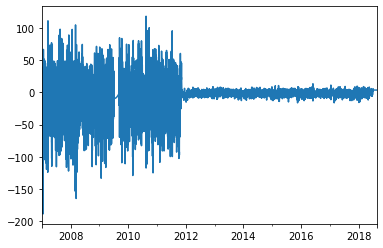

In [14]:
frame["YSpeedPred_Step1[m/s]"].plot()